In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.replace("?", np.nan, inplace= True)

In [4]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

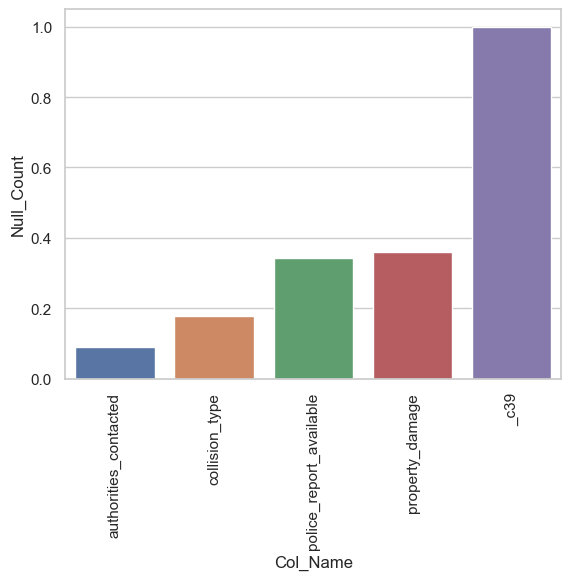

In [8]:

missing = data.isnull().sum() / len(data) # perncentage 
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns=['Null_Count']
missing.index.names=['Col_Name']
missing = missing.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Col_Name',y='Null_Count',data=missing)
plt.xticks(rotation=90)
plt.show()

In [15]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])

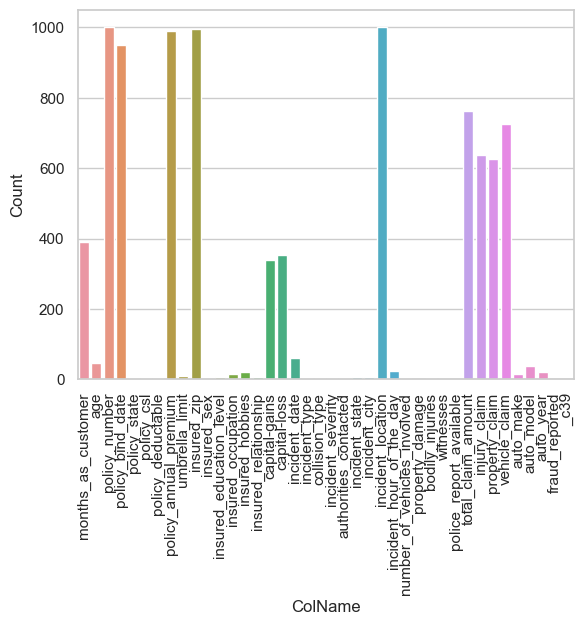

In [17]:

unique = data.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='ColName',y='Count',data=unique)
plt.xticks(rotation=90)
plt.show()

In [18]:
unique.sort_values(by='Count',ascending=False)


,ColName,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [19]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

data.drop(to_drop, inplace = True, axis = 1)

In [22]:
data.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)


In [23]:
X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

In [24]:
categorical_cols = X.select_dtypes(include = ['object'])
categorical_cols = pd.get_dummies(categorical_cols, drop_first = True)
categorical_cols.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


In [25]:

numerical_col = X.select_dtypes(include = ['int64'])
X = pd.concat([numerical_col, categorical_cols], axis = 1)

In [26]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,True,False,False,False,False,False,False,False


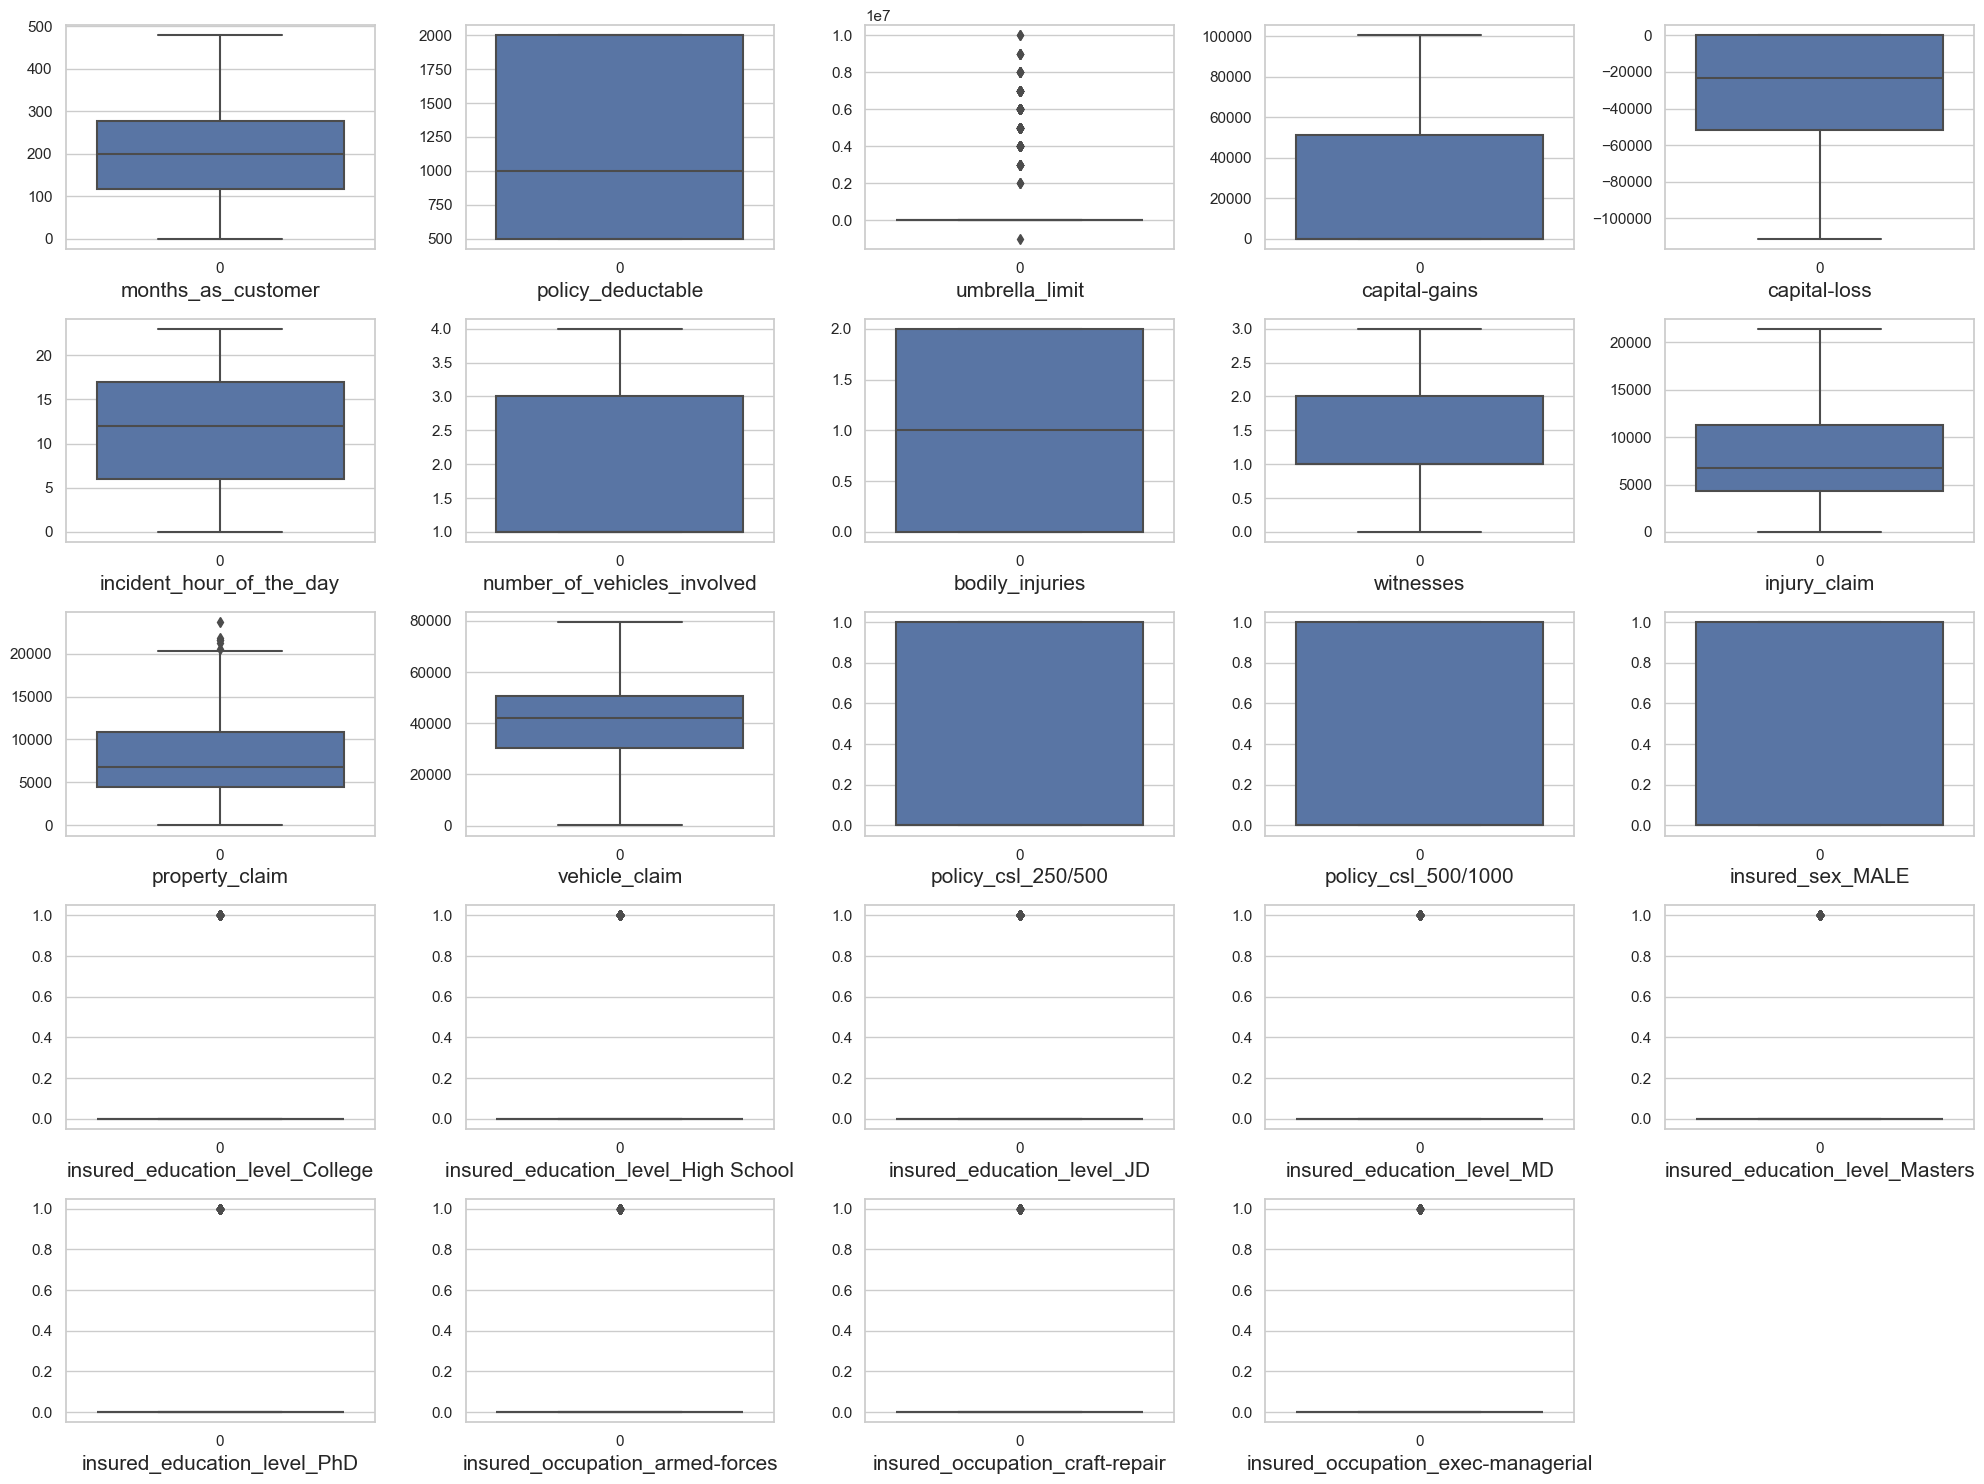

In [27]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [29]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
766,224,1000,0,0,-47100,21,3,2,1,12360,...,True,False,False,True,False,True,False,False,True,False
35,147,1000,6000000,53300,-49200,15,1,2,0,10620,...,False,False,False,False,False,False,True,False,True,True
504,61,2000,6000000,0,-53800,16,2,1,0,11960,...,True,False,False,False,False,True,False,False,True,False
294,156,500,0,0,-51800,16,4,1,2,5340,...,True,False,True,False,False,False,False,True,False,True
145,398,500,0,0,-57900,18,1,2,1,7640,...,False,False,False,False,False,False,False,True,True,False


In [31]:
numerical_data = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [33]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = numerical_data.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
766,0.210086,-0.240074,-0.458472,-0.910478,-0.738166,1.350545,1.133507,1.224745,-0.460311,1.060903,-0.254667,0.273530
35,-0.458774,-0.240074,2.256166,1.006290,-0.812959,0.479475,-0.834387,1.224745,-1.366435,0.693486,-0.435242,-0.049977
504,-1.205812,1.389389,2.256166,-0.910478,-0.976791,0.624653,0.149560,0.000000,-1.366435,0.976439,-0.296179,-0.118503
294,-0.380595,-1.054806,-0.458472,-0.910478,-0.905560,0.624653,2.117454,0.000000,0.445813,-0.421434,-0.429015,0.244844
145,1.721534,-1.054806,-0.458472,-0.910478,-1.122816,0.915010,-0.834387,1.224745,-0.460311,0.064232,1.634105,2.033957


In [34]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)
X_train = pd.concat([scaled_num_df, X_train], axis = 1)
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
766,0.210086,-0.240074,-0.458472,-0.910478,-0.738166,1.350545,1.133507,1.224745,-0.460311,1.060903,...,True,False,False,True,False,True,False,False,True,False
35,-0.458774,-0.240074,2.256166,1.006290,-0.812959,0.479475,-0.834387,1.224745,-1.366435,0.693486,...,False,False,False,False,False,False,True,False,True,True
504,-1.205812,1.389389,2.256166,-0.910478,-0.976791,0.624653,0.149560,0.000000,-1.366435,0.976439,...,True,False,False,False,False,True,False,False,True,False
294,-0.380595,-1.054806,-0.458472,-0.910478,-0.905560,0.624653,2.117454,0.000000,0.445813,-0.421434,...,True,False,True,False,False,False,False,True,False,True
145,1.721534,-1.054806,-0.458472,-0.910478,-1.122816,0.915010,-0.834387,1.224745,-0.460311,0.064232,...,False,False,False,False,False,False,False,True,True,False


In [35]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model_train_acc = accuracy_score(y_train, svc_model.predict(X_train))
svc_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",svc_model_train_acc)
print("Testing Accuracy: ", svc_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  0.8613333333333333
Testing Accuracy:  0.776
[[194   0]
 [ 56   0]]
              precision    recall  f1-score   support

           N       0.78      1.00      0.87       194
           Y       0.00      0.00      0.00        56

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.78      0.68       250



In [36]:

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [37]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model_train_acc = accuracy_score(y_train, knn_model.predict(X_train))
knn_model_test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy: ",knn_model_train_acc)
print("Testing Accuracy: ", knn_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training Accuracy:  0.7466666666666667
Testing Accuracy:  0.776
[[194   0]
 [ 56   0]]
              precision    recall  f1-score   support

           N       0.78      1.00      0.87       194
           Y       0.00      0.00      0.00        56

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.78      0.68       250



In [38]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(X_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ",decision_tree_model_train_acc)
print("Test accuracy: ",decision_tree_model_test_acc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  0.564
[[121  73]
 [ 36  20]]
              precision    recall  f1-score   support

           N       0.77      0.62      0.69       194
           Y       0.22      0.36      0.27        56

    accuracy                           0.56       250
   macro avg       0.49      0.49      0.48       250
weighted avg       0.65      0.56      0.60       250



In [40]:

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(decision_tree_model, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [41]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8133333333333332


In [42]:
decision_tree_model = grid_search.best_estimator_
y_pred = decision_tree_model.predict(X_test)

In [43]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score(y_train, decision_tree_model.predict(X_train))
decision_tree_model_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {decision_tree_model_train_acc}")
print(f"Test accuracy of Decision Tree is : {decision_tree_model_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8173333333333334
Test accuracy of Decision Tree is : 0.788
[[157  37]
 [ 16  40]]
              precision    recall  f1-score   support

           N       0.91      0.81      0.86       194
           Y       0.52      0.71      0.60        56

    accuracy                           0.79       250
   macro avg       0.71      0.76      0.73       250
weighted avg       0.82      0.79      0.80       250

